# **Diversity report**

## **Completeness analysis**

Author: Daning Montaño - Ocampo

# **1. Packages and libraries**

In [1]:
library(dplyr)
library(ggplot2)
library(sf)
library(iNEXT)
library(tidyr)
library(vegan)
library(tibble)
#library(doParallel)
#


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Warning message:
package ‘dplyr’ was built under R version 4.3.3 


Linking to GEOS 3.11.2, GDAL 3.6.2, PROJ 9.2.0; sf_use_s2() is TRUE


Warning message:
package ‘iNEXT’ was built under R version 4.3.3 
Warning message:
package ‘tidyr’ was built under R version 4.3.3 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-4


Warning messages:
1: package ‘vegan’ was built under R version 4.3.2 
2: package ‘lattice’ was built under R version 4.3.3 


# 2. Load clean data and grids

## 2.1. Records

In [19]:
species_records = read.csv("../Data/Records/species_records_clean.csv")

# Transform to sf object
species_records_sf = st_as_sf(species_records, coords = c("decimalLongitude", "decimalLatitude"), crs = 4326)
species_records_sf

Simple feature collection with 26187 features and 16 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -78.46784 ymin: -2.068253 xmax: -75.5828 ymax: 1.5
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id occurrenceID basisOfRecord
1          1        BIOWEB   BIOWEB_45    QCA129294          <NA>
2          2        BIOWEB   BIOWEB_46    QCA129427          <NA>
3          3        BIOWEB   BIOWEB_49    QCA129514          <NA>
4          5        BIOWEB   BIOWEB_51    QCA129793          <NA>
5          8        BIOWEB   BIOWEB_54    QCA132457          <NA>
6          9        BIOWEB   BIOWEB_55     QCA13289          <NA>
7         10        BIOWEB   BIOWEB_57    QCA133934          <NA>
8         11        BIOWEB   BIOWEB_58     QCA13458          <NA>
9         12        BIOWEB   BIOWEB_59     QCA13492          <NA>
10        13        BIOWEB   BIOWEB_60     QCA13534          <NA>
   verbatimEventDate   recordedBy year institutionCode taxonRa

## 2.2. Arajuno polygon

In [13]:
arajuno_poly = st_read("../Data/SHP/Arajuno.shp")

arajuno_poly

Reading layer `Arajuno' from data source 
  `C:\PACHAMAMA\CONSERVACION\BIODIVERSIDAD ARAJUNO\ArajunoBiodiversity\Data\SHP\Arajuno.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -77.8054 ymin: -1.703907 xmax: -75.58041 ymax: -1.003981
Geodetic CRS:  WGS 84


Simple feature collection with 1 feature and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -77.8054 ymin: -1.703907 xmax: -75.58041 ymax: -1.003981
Geodetic CRS:  WGS 84
  DPA_VALOR DPA_ANIO DPA_CANTON DPA_DESCAN DPA_PROVIN DPA_DESPRO
1         0     2012       1604    ARAJUNO         16    PASTAZA
                        geometry
1 POLYGON ((-77.06455 -1.0048...

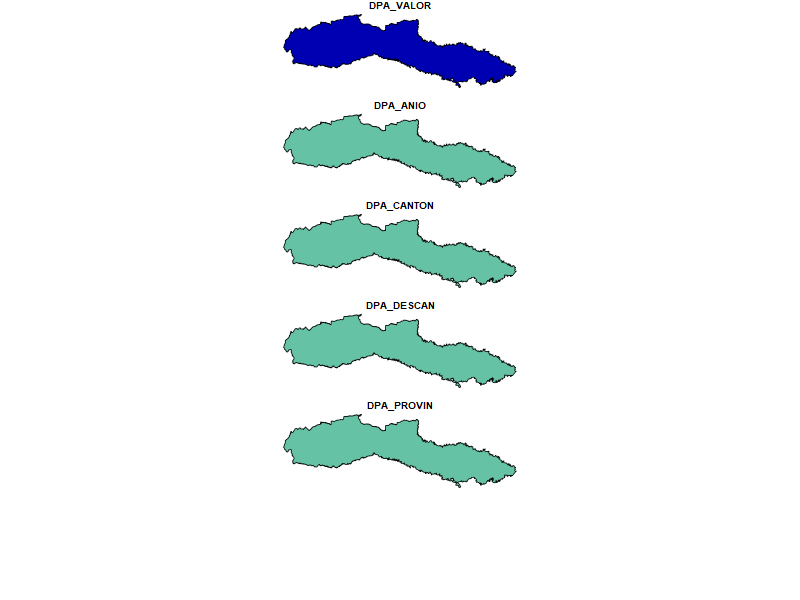

In [14]:
plot(arajuno_poly)

## 2.3. Hexagons 10 km

In [15]:
grid_10km = st_read("../Data/SHP/HEXAGON_10_KM.shp")
grid_10km$id_10km = grid_10km$id
grid_10km = grid_10km %>% select(-id)

Reading layer `HEXAGON_10_KM' from data source 
  `C:\PACHAMAMA\CONSERVACION\BIODIVERSIDAD ARAJUNO\ArajunoBiodiversity\Data\SHP\HEXAGON_10_KM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 928 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -77.80573 ymin: -1.749935 xmax: -75.54047 ymax: -1.001861
Geodetic CRS:  WGS 84


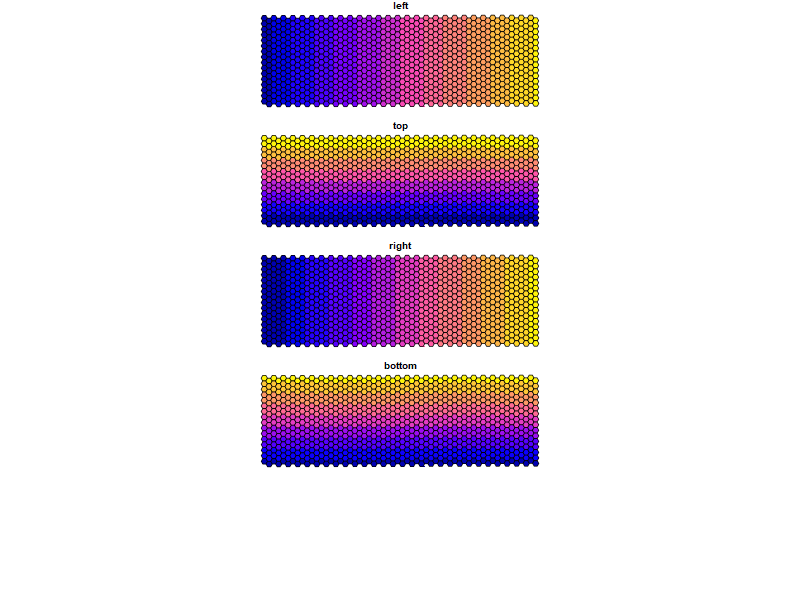

In [16]:
plot(grid_10km)

Cut Hexagons using Arajuno poly

Warning message:
attribute variables are assumed to be spatially constant throughout all geometries 
Warning message:
plotting the first 10 out of 11 attributes; use max.plot = 11 to plot all 


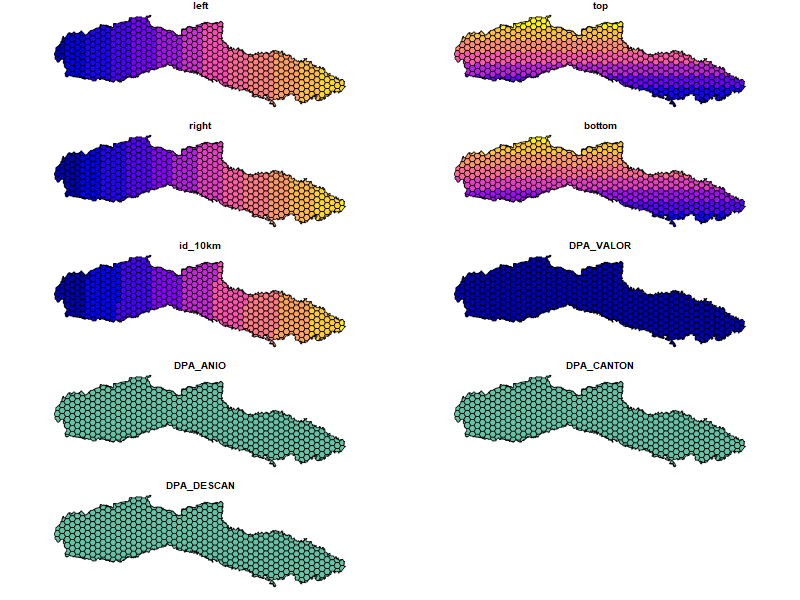

In [17]:
grid_10km_cut = st_intersection(grid_10km, arajuno_poly)
plot(grid_10km_cut)

# 3. Join points to grids

In [20]:
recors_grid_10km <- st_join(
  species_records_sf,
  grid_10km_cut,
  join = st_within                              # inside polygons
)
recors_grid_10km

Simple feature collection with 26187 features and 27 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -78.46784 ymin: -2.068253 xmax: -75.5828 ymax: 1.5
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id occurrenceID basisOfRecord
1          1        BIOWEB   BIOWEB_45    QCA129294          <NA>
2          2        BIOWEB   BIOWEB_46    QCA129427          <NA>
3          3        BIOWEB   BIOWEB_49    QCA129514          <NA>
4          5        BIOWEB   BIOWEB_51    QCA129793          <NA>
5          8        BIOWEB   BIOWEB_54    QCA132457          <NA>
6          9        BIOWEB   BIOWEB_55     QCA13289          <NA>
7         10        BIOWEB   BIOWEB_57    QCA133934          <NA>
8         11        BIOWEB   BIOWEB_58     QCA13458          <NA>
9         12        BIOWEB   BIOWEB_59     QCA13492          <NA>
10        13        BIOWEB   BIOWEB_60     QCA13534          <NA>
   verbatimEventDate   recordedBy year institutionCode taxonRa

In [21]:
colnames(recors_grid_10km)

 [1] "id_record"         "database_name"     "database_id"      
 [4] "occurrenceID"      "basisOfRecord"     "verbatimEventDate"
 [7] "recordedBy"        "year"              "institutionCode"  
[10] "taxonRank"         "class"             "order"            
[13] "family"            "genus"             "specificEpithet"  
[16] "scientificName"    "left"              "top"              
[19] "right"             "bottom"            "id_10km"          
[22] "DPA_VALOR"         "DPA_ANIO"          "DPA_CANTON"       
[25] "DPA_DESCAN"        "DPA_PROVIN"        "DPA_DESPRO"       
[28] "geometry"         

# 4. Records per 10 km grid

## 4.1. All Taxas

We calculate the number of records per 10 km grid usind id_10km

In [22]:
total_records_per_grid = recors_grid_10km %>%
  as.data.frame() %>%
  group_by(id_10km)%>%
  summarise(Total_records = n()) %>%
  as.data.frame()


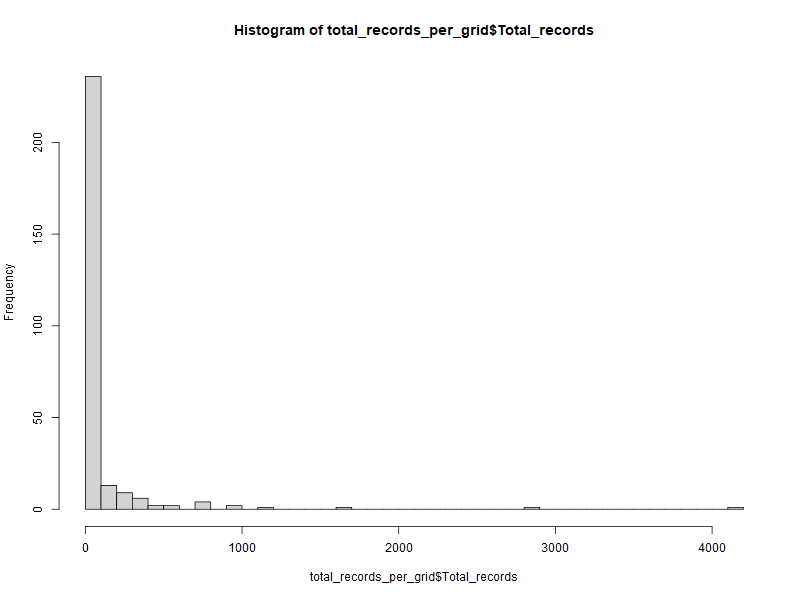

In [23]:
hist(total_records_per_grid$Total_records, breaks = 50)

Join results to 10 km grid

In [25]:
grid_10km_cut = grid_10km_cut%>% 
  left_join(total_records_per_grid, by = "id_10km")

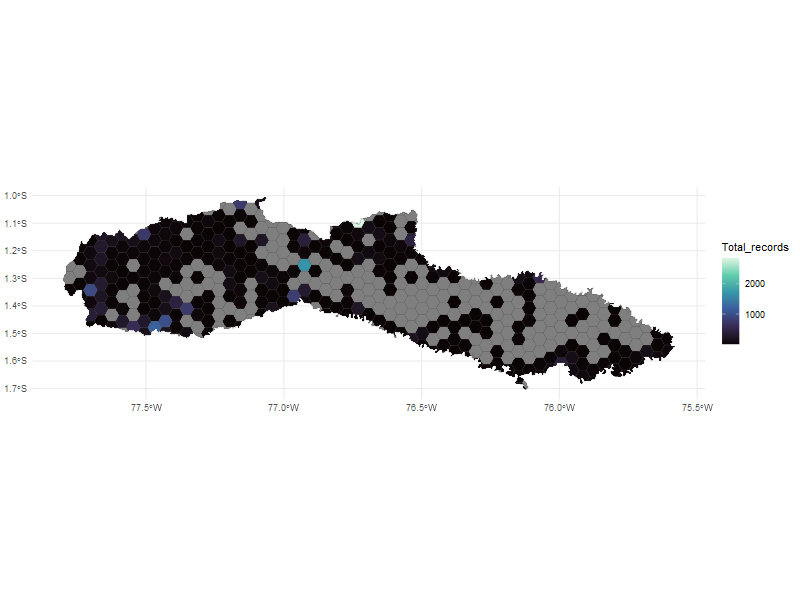

In [26]:
ggplot(grid_10km_cut) +
  geom_sf(aes(fill = Total_records), color = "grey30", size = 0.1) +
  scale_fill_viridis_c(option = "mako") +
  theme_minimal()

Records per taxa

In [50]:
colnames(recors_grid_10km)

 [1] "id_record"         "database_name"     "database_id"      
 [4] "occurrenceID"      "basisOfRecord"     "verbatimEventDate"
 [7] "recordedBy"        "year"              "institutionCode"  
[10] "taxonRank"         "class"             "order"            
[13] "family"            "genus"             "specificEpithet"  
[16] "scientificName"    "left"              "top"              
[19] "right"             "bottom"            "id_10km"          
[22] "DPA_VALOR"         "DPA_ANIO"          "DPA_CANTON"       
[25] "DPA_DESCAN"        "DPA_PROVIN"        "DPA_DESPRO"       
[28] "geometry"         

In [53]:
unique(recors_grid_10km$class)

 [1] "Magnoliopsida"     "Liliopsida"        "Amphibia"         
 [4] "Insecta"           "Bivalvia"          "Arachnida"        
 [7] "Chilopoda"         "Mammalia"          "Aves"             
[10] "Reptilia"          NA                  "Actinopterygii"   
[13] "Lycopodiopsida"    "Polypodiopsida"    "Agaricomycetes"   
[16] "Pezizomycetes"     "Sordariomycetes"   "Bryopsida"        
[19] "Jungermanniopsida" "Elasmobranchii"    "Myxomycetes"      
[22] "Gastropoda"        "Tremellomycetes"   "Ostracoda"        
[25] "Gnetopsida"        "Cycadopsida"       "Malacostraca"     

Create new category

In [94]:
recors_grid_10km <- recors_grid_10km %>% 
  mutate(group = case_when(
    # Plants (vascular + non-vascular)
    class %in% c("Magnoliopsida", "Liliopsida",
                 "Lycopodiopsida", "Polypodiopsida",
                 "Bryopsida", "Jungermanniopsida",
                 "Gnetopsida", "Cycadopsida") ~ "Plants",

    # Birds
    class == "Aves" ~ "Birds",

    # Mammals
    class == "Mammalia" ~ "Mammals",

    # Arthropods + other invertebrates similar
    class %in% c("Insecta", "Arachnida", "Chilopoda",
                 "Malacostraca", "Gastropoda", "Bivalvia",
                 "Ostracoda") ~ "Arthropods",

    # Amphibians
    class == "Amphibia" ~ "Amphibians",

    # Reptiles
    class == "Reptilia" ~ "Reptiles",

    # Fungi
    class %in% c("Agaricomycetes", "Pezizomycetes",
                 "Sordariomycetes", "Tremellomycetes") ~ "Fungi",

    # Fish classes (separados si es necesario)
    class %in% c("Actinopterygii", "Elasmobranchii") ~ "Fish",

    # Everything else
    TRUE ~ "Others"
  ))
  records_x_taxa = recors_grid_10km %>%
    as.data.frame()%>%
    group_by(group)%>%
    summarise(Records = n())%>%
    arrange(-Records)
  
  records_x_taxa

# A tibble: 9 × 2
  group      Records
  <chr>        <int>
1 Plants       11593
2 Birds         8442
3 Mammals       2156
4 Amphibians    2080
5 Reptiles      1124
6 Arthropods     577
7 Fish           174
8 Fungi           32
9 Others           9

## 4.2. Records per taxa

Birds

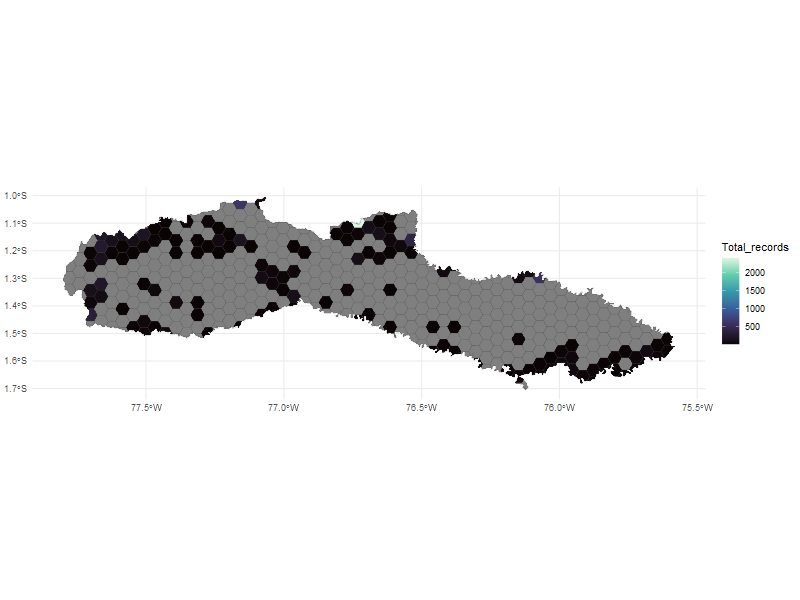

In [95]:

aves_records_per_grid = recors_grid_10km %>%
  as.data.frame() %>%
  filter(group== "Birds")%>%
  group_by(id_10km)%>%
  summarise(Total_records = n()) %>%
  as.data.frame()

grid_10km_cut%>% 
select(-Total_records)%>% 
left_join(aves_records_per_grid, by = "id_10km")%>% 
  ggplot() +
    geom_sf(aes(fill = Total_records), color = "grey30", size = 0.1) +
    scale_fill_viridis_c(option = "mako") +
    theme_minimal()

Warning message:
Removed 367 rows containing non-finite outside the scale range (`stat_bin()`). 


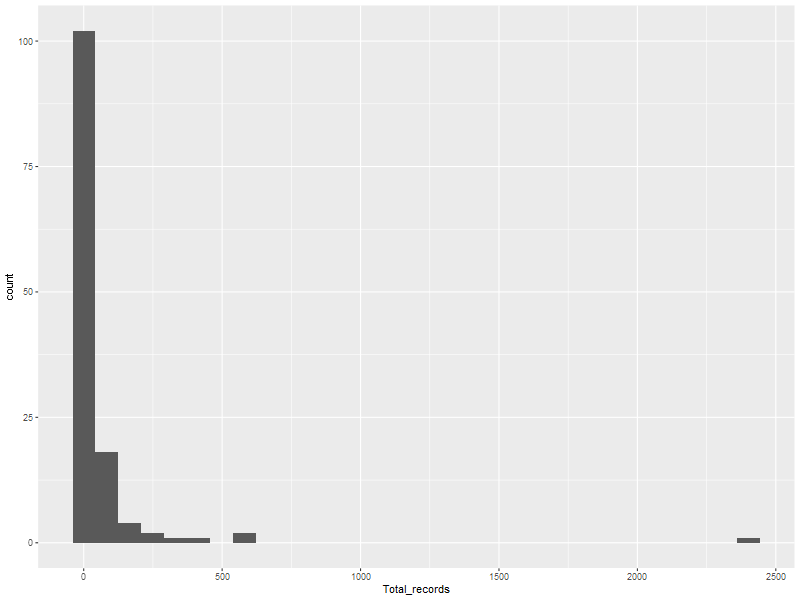

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.

In [89]:
grid_10km_cut%>% 
select(-Total_records)%>% 
left_join(aves_records_per_grid, by = "id_10km")%>% 
  ggplot() +
    geom_histogram(aes(Total_records))

Plants

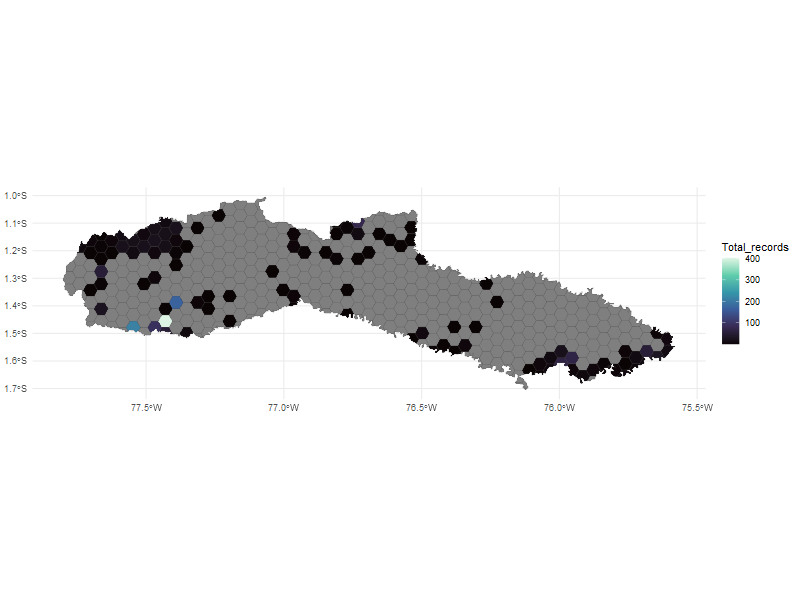

In [97]:

plants_records_per_grid = recors_grid_10km %>%
  as.data.frame() %>%
  filter(group== "Mammals")%>%
  group_by(id_10km)%>%
  summarise(Total_records = n()) %>%
  as.data.frame()

grid_10km_cut%>% 
select(-Total_records)%>% 
left_join(plants_records_per_grid, by = "id_10km")%>% 
  ggplot() +
    geom_sf(aes(fill = Total_records), color = "grey30", size = 0.1) +
    scale_fill_viridis_c(option = "mako") +
    theme_minimal()

# 5. Sp per 10 km grid

In [30]:
total_sp_per_grid = recors_grid_10km %>%
  as.data.frame() %>%
  group_by(id_10km)%>%
  distinct(scientificName) %>%
  summarise(Total_sp = n()) %>%
  as.data.frame()
total_sp_per_grid

    id_10km Total_sp
1         8        1
2        20        3
3        21        7
4        23        3
5        24       18
6        36        1
7        37       35
8        38       44
9        39       39
10       40      280
11       41       38
12       42      128
13       43        1
14       51       93
15       52      114
16       53      137
17       54       35
18       55      164
19       56      116
20       57      145
21       58        1
22       68       80
23       69        8
24       70        5
25       71       24
26       72        1
27       73        1
28       75       24
29       83       84
30       84        5
31       85        8
32       86        3
33       87        7
34       89       28
35       90      109
36      100       56
37      101       15
38      103        6
39      107      185
40      115      344
41      116        4
42      117        3
43      118        5
44      119        2
45      120        7
46      121        1
47      122  

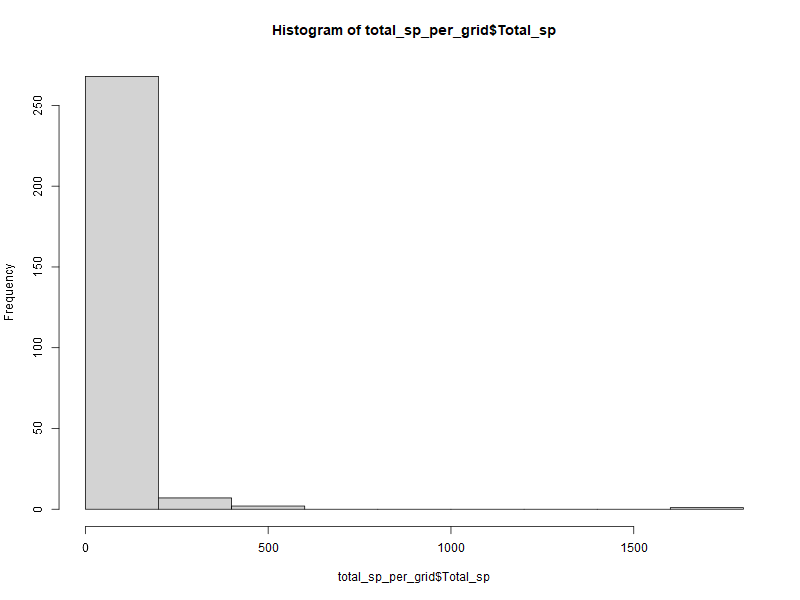

In [33]:
hist(total_sp_per_grid$Total_sp)

In [35]:
grid_10km_cut = grid_10km_cut%>% 
  left_join(total_sp_per_grid, by = "id_10km")
grid_10km_cut

Simple feature collection with 498 features and 13 fields
Geometry type: GEOMETRY
Dimension:     XY
Bounding box:  xmin: -77.80148 ymin: -1.703907 xmax: -75.58041 ymax: -1.004941
Geodetic CRS:  WGS 84
First 10 features:
       left     top    right  bottom id_10km DPA_VALOR DPA_ANIO DPA_CANTON
1  855570.7 9863766 861344.2 9858766       6         0     2012       1604
2  855570.7 9858766 861344.2 9853766       7         0     2012       1604
3  855570.7 9853766 861344.2 9848766       8         0     2012       1604
4  859900.8 9871266 865674.3 9866266      20         0     2012       1604
5  859900.8 9866266 865674.3 9861266      21         0     2012       1604
6  859900.8 9861266 865674.3 9856266      22         0     2012       1604
7  859900.8 9856266 865674.3 9851266      23         0     2012       1604
8  859900.8 9851266 865674.3 9846266      24         0     2012       1604
9  859900.8 9846266 865674.3 9841266      25         0     2012       1604
10 859900.8 9841266 865674.3 9

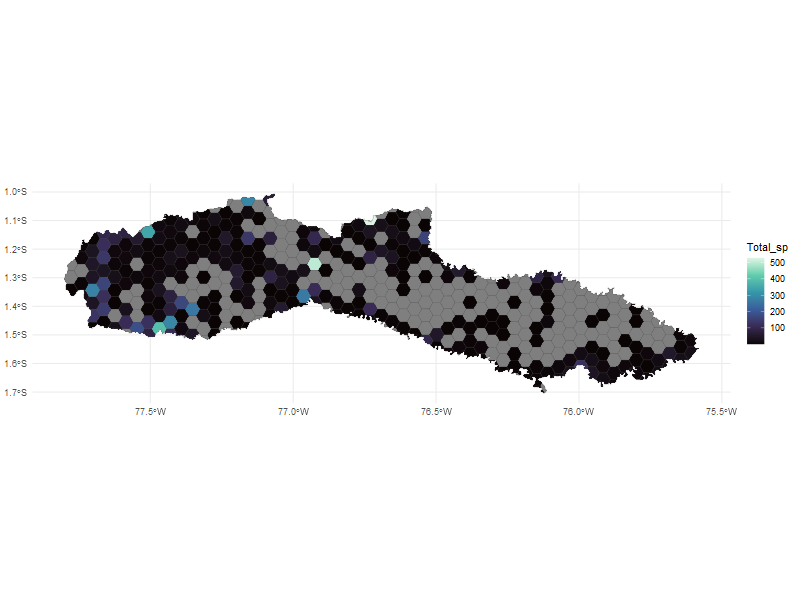

In [36]:
ggplot(grid_10km_cut) +
  geom_sf(aes(fill = Total_sp), color = "grey30", size = 0.1) +
  scale_fill_viridis_c(option = "mako") +
  theme_minimal()

## 5.1 Correlaction records x sp

In [37]:
cor(grid_10km_cut$Total_records, grid_10km_cut$Total_sp, method = "spearman", use = "complete.obs")

[1] 0.9735929

Warning messages:
1: Removed 221 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 221 rows containing missing values or values outside the scale range
(`geom_point()`). 


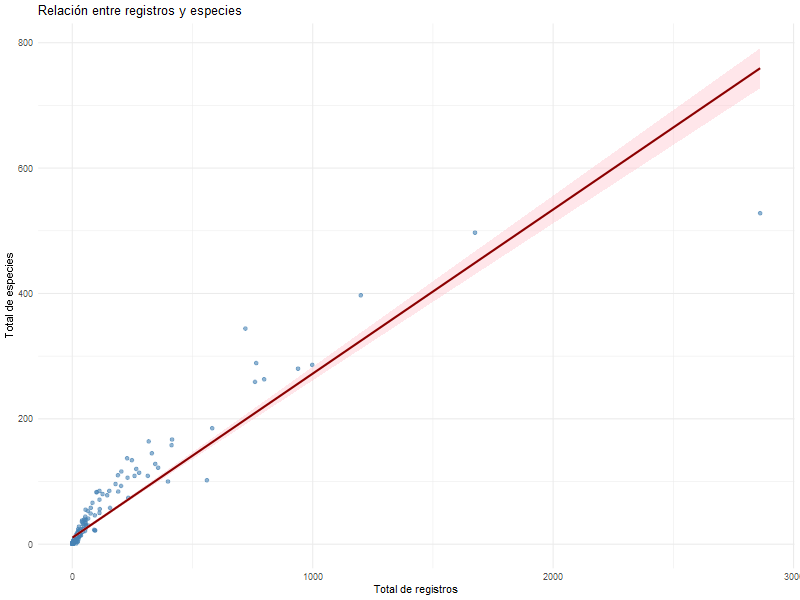

`geom_smooth()` using formula = 'y ~ x'

In [38]:
ggplot(grid_10km_cut, aes(x = Total_records, y = Total_sp)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred", fill = "pink") +
  theme_minimal() +
  labs(
    x = "Total de registros",
    y = "Total de especies",
    title = "Relación entre registros y especies"
  )

# 6. Sampling Completness

## 6.1. Completness - Country level

Calculate completnes for all country using incidens data and each 10 km cell is a unit

In [40]:
recors_grid_10km

Simple feature collection with 26187 features and 27 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -78.46784 ymin: -2.068253 xmax: -75.5828 ymax: 1.5
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id occurrenceID basisOfRecord
1          1        BIOWEB   BIOWEB_45    QCA129294          <NA>
2          2        BIOWEB   BIOWEB_46    QCA129427          <NA>
3          3        BIOWEB   BIOWEB_49    QCA129514          <NA>
4          5        BIOWEB   BIOWEB_51    QCA129793          <NA>
5          8        BIOWEB   BIOWEB_54    QCA132457          <NA>
6          9        BIOWEB   BIOWEB_55     QCA13289          <NA>
7         10        BIOWEB   BIOWEB_57    QCA133934          <NA>
8         11        BIOWEB   BIOWEB_58     QCA13458          <NA>
9         12        BIOWEB   BIOWEB_59     QCA13492          <NA>
10        13        BIOWEB   BIOWEB_60     QCA13534          <NA>
   verbatimEventDate   recordedBy year institutionCode taxonRa

In [43]:
ecu_incidens_matrix <- recors_grid_10km %>%
  as.data.frame() %>%
  distinct(id_10km, scientificName) %>%          # 1 por unidad-especie
  mutate(val = 1L) %>%
  pivot_wider(names_from = scientificName, values_from = val, values_fill = 0) %>%
  arrange(id_10km)
ids_unidades_ecu <- ecu_incidens_matrix$id_10km

# Quitamos la columna de IDs para dejar solo 0/1 por especie
incidences_ecu_df <- ecu_incidens_matrix %>% dplyr::select(-id_10km)

# Matriz of incidences - iNext
inext_in_ecu <- list(ensamblaje = as.data.frame(t(incidences_ecu_df)))

inext_in_ecu


Use iNEXT funtion to calculate the sampling coverage in Ecuador, an only extract richness (q=0) and sampling coverage

In [44]:
result_inext_ecu <- iNEXT(inext_in_ecu, q = 0, datatype = "incidence_raw", se = TRUE, conf = 0.95,nboot= 200 )

In [45]:
result_inext_ecu

Compare 1 assemblages with Hill number order q = 0.
$class: iNEXT

$DataInfo: basic data information
  Assemblage   T     U S.obs     SC   Q1  Q2  Q3  Q4  Q5 Q6 Q7 Q8 Q9 Q10
1 ensamblaje 278 10424  3822 0.8012 2077 613 323 204 159 99 71 50 51  34

$iNextEst: diversity estimates with rarefied and extrapolated samples.
$size_based (LCL and UCL are obtained for fixed size.)

   Assemblage   t        Method Order.q        qD     qD.LCL     qD.UCL
1  ensamblaje   1   Rarefaction       0   37.4964   36.77193   38.22088
10 ensamblaje 139   Rarefaction       0 2571.3169 2526.90220 2615.73150
20 ensamblaje 278      Observed       0 3822.0000 3746.90969 3897.09031
30 ensamblaje 410 Extrapolation       0 4680.8466 4576.72041 4784.97275
40 ensamblaje 556 Extrapolation       0 5387.9955 5248.97533 5527.01557
           SC    SC.LCL     SC.UCL
1  0.02178879 0.0206316 0.02294598
10 0.70211334 0.6945539 0.70967279
20 0.80117197 0.7938874 0.80845658
30 0.84987721 0.8417906 0.85796378
40 0.88997967 0.88

In [46]:
info_inext_ecu <- DataInfo(inext_in_ecu, datatype = "incidence_raw")  # columna SC = sample coverage; T = # unidades de muestreo


In [47]:
info_inext_ecu

  Assemblage   T     U S.obs     SC   Q1  Q2  Q3  Q4  Q5 Q6 Q7 Q8 Q9 Q10
1 ensamblaje 278 10424  3822 0.8012 2077 613 323 204 159 99 71 50 51  34

Warning messages:
1: In ggiNEXT.iNEXT(result_inext_ecu, type = 2) :
  invalid color.var setting, the iNEXT object do not consist multiple assemblages, change setting as Order.q
2: `aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the iNEXT package.
  Please report the issue at <]8;;https://github.com/JohnsonHsieh/iNEXT/issueshttps://github.com/JohnsonHsieh/iNEXT/issues]8;;>.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


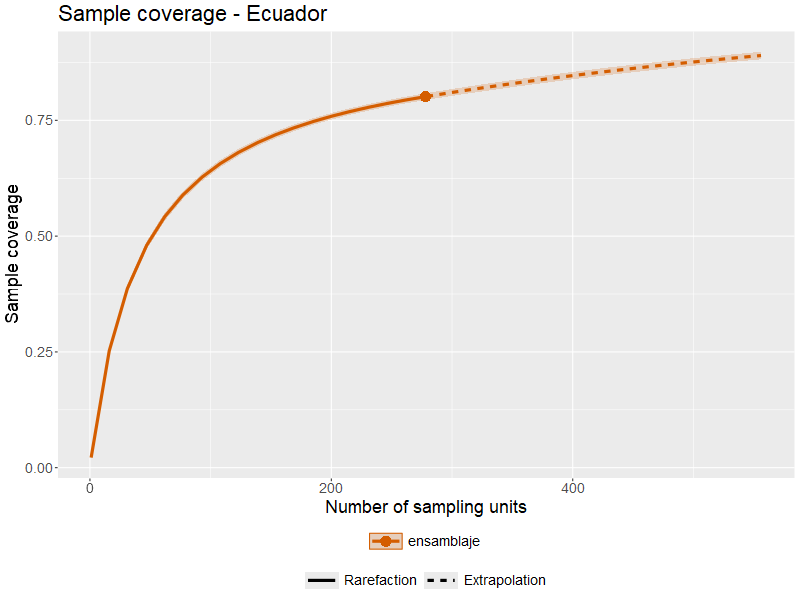

In [48]:
plot_units_sc <- ggiNEXT(result_inext_ecu, type = 2) + labs(title = "Sample coverage - Ecuador")
plot_units_sc

Warning message:
In ggiNEXT.iNEXT(result_inext_ecu, type = 1) :
  invalid color.var setting, the iNEXT object do not consist multiple assemblages, change setting as Order.q


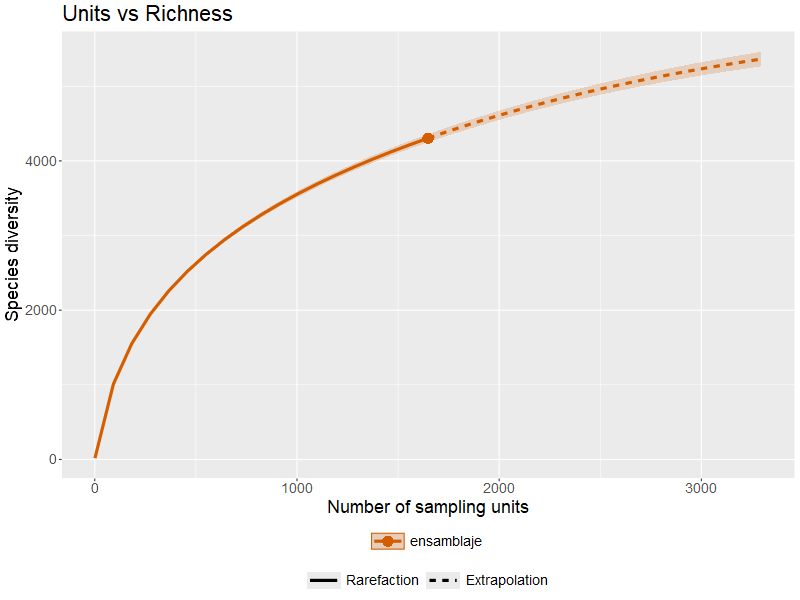

In [469]:
plot_units_richness <- ggiNEXT(result_inext_ecu, type = 1) + labs(title = "Units vs Richness")
plot_units_richness

## 6.2. Grid

### 6.2.1 Sample coverage

Calculamos la completitud de la muestra usando el paquete iNEXT. Para esto se usarán las incidencias de las especies, y dentro de cada grid de 10 km, cada celda de 2 km es una unidad, en done evaluamos como el incluir unidades cambia la cobertura de la muestra

In [470]:
recors_grid_2km

Simple feature collection with 106818 features and 19 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34
5          9          BNDB    BNDB_979 e7f27209-8604-44de-b43e-4fe8abc2f67c
6         11          BNDB    BNDB_982 8b392663-4188-4e7b-b521-0980ea4d4403
7         13          BNDB    BNDB_985 b7f21191-056b-4024-a0d5-f678dfb20773
8         15          BNDB    BNDB_988 14c6e35a-b276-4320-aedf-3cf0cd79b875
9         17          BNDB    BNDB_990 090cfbfa-0c2f-4462-b1d4-1947399a3946
10        19          B

In [471]:

# Unique 10-km IDs
cid_10km <- unique(recors_grid_2km$id_10km)

# Results container
results_s_cov <- data.frame(
  id_10km = integer(),
  Samplig_coverage = numeric(),  # observed SC
  n_units = numeric(),           # T
  n_incidences = numeric(),      # U
  genus_obs = numeric(),            # S.obs
  Q1 = numeric(),
  Q2 = numeric(),
  sc_ext = numeric(),            # SC at max coverage row
  n_units_ext = numeric(),       # t at max coverage row
  genus_ext = numeric(),            # qD at max coverage row
  stringsAsFactors = FALSE
)

# Progress bar
pb <- txtProgressBar(min = 0, max = length(cid_10km), style = 3)
count <- 0

for (i in cid_10km) {

  # Build incidence matrix (rows = id_2km, cols = species, 0/1)
  records_by_id <- recors_grid_2km %>% dplyr::filter(id_10km == i)

  incidens_matrix_2km <- records_by_id %>%
    as.data.frame() %>%
    dplyr::distinct(id_2km, genus) %>%
    dplyr::mutate(val = 1L) %>%
    tidyr::pivot_wider(names_from = genus, values_from = val, values_fill = 0) %>%
    dplyr::arrange(id_2km)

  ids_unidades_2km <- incidens_matrix_2km$id_2km
  incidens_matrix_2km_df <- incidens_matrix_2km %>% dplyr::select(-id_2km)

  # Ensure numeric 0/1 for iNEXT
  incidens_matrix_2km_df[] <- lapply(incidens_matrix_2km_df, as.numeric)

  # iNEXT input
  inext_grid_2km <- list(ensamblaje = as.data.frame(t(incidens_matrix_2km_df)))

  # Run iNEXT and extract metrics
  sampl_result <- tryCatch({
    result_inext_2km_grid <- iNEXT(
      inext_grid_2km,
      q = 0,
      datatype = "incidence_raw",
      se = FALSE
    )

    sc_obs      <- result_inext_2km_grid$DataInfo$SC
    n_units_obs <- result_inext_2km_grid$DataInfo$T
    n_incid     <- result_inext_2km_grid$DataInfo$U
    genus_obs      <- result_inext_2km_grid$DataInfo$S.obs
    Q1          <- result_inext_2km_grid$DataInfo$Q1
    Q2          <- result_inext_2km_grid$DataInfo$Q2

    cb <- result_inext_2km_grid$iNextEst$coverage_based
    sc_ext      <- if (!is.null(cb)) tail(cb$SC, 1) else NA_real_
    n_units_ext <- if (!is.null(cb)) tail(cb$t,  1) else NA_real_
    genus_ext      <- if (!is.null(cb)) tail(cb$qD, 1) else NA_real_

    data.frame(
      Samplig_coverage = sc_obs,
      n_units = n_units_obs,
      n_incidences = n_incid,
      genus_obs = genus_obs,
      Q1 = Q1,
      Q2 = Q2,
      sc_ext = sc_ext,
      n_units_ext = n_units_ext,
      genus_ext = round(genus_ext, 0),
      stringsAsFactors = FALSE
    )
  }, error = function(e) {
    data.frame(
      Samplig_coverage = NA_real_,
      n_units = NA_real_,
      n_incidences = NA_real_,
      genus_obs = NA_real_,
      Q1 = NA_real_,
      Q2 = NA_real_,
      sc_ext = NA_real_,
      n_units_ext = NA_real_,
      genus_ext = NA_real_,
      stringsAsFactors = FALSE
    )
  })

  # Append row for this 10-km cell
  results_s_cov <- rbind(
    results_s_cov,
    cbind(data.frame(id_10km = i, stringsAsFactors = FALSE), sampl_result)
  )

  count <- count + 1
  setTxtProgressBar(pb, count)
}

# Close progress bar
close(pb)



  |======================================================================| 100%

There were 50 or more warnings (use warnings() to see the first 50)


In [472]:
results_s_cov

    id_10km Samplig_coverage n_units n_incidences genus_obs  Q1 Q2     sc_ext
1      2149           0.1948       4           27        25  23  2 0.35731935
2      4633           0.5017       4           58        45  34  9 0.73989689
3      4444           0.0692       8           33        32  31  1 0.13505533
4      4073           0.0741       2           26        26  26  0 0.21319265
5      4448           0.1705       6           14        13  12  1 0.31865019
6      5089           0.1756       4           15        14  13  1 0.32507449
7      2417           0.1526      11           72        67  62  5 0.28932200
8      3888           0.0599       6           40        39  38  1 0.11714331
9      3143           0.8333       5           48        28  12 12 0.97805213
10     3157           0.0370       5           14        14  14  0 0.20263439
11     2238           0.5342       5           51        39  28 10 0.79514225
12     2807               NA      NA           NA        NA  NA 

In [473]:
View(results_s_cov)

### 6.2.2. Species accumulation curve - Slope

In [474]:
# Unique 10-km IDs
cid_10km <- unique(recors_grid_2km$id_10km)

# Results container
results_slope <- data.frame(
  id_10km = integer(),
  slope = numeric()  # observed SC
)

# Progress bar
#pb <- txtProgressBar(min = 0, max = length(cid_10km), style = 3)
#count <- 0

for (i in cid_10km) {

  # Build incidence matrix (rows = id_2km, cols = species, 0/1)
  records_by_id <- recors_grid_2km %>% dplyr::filter(id_10km == i)

  incidens_matrix_2km <- records_by_id %>%
    as.data.frame() %>%
    dplyr::distinct(id_2km, genus) %>%
    dplyr::mutate(val = 1L) %>%
    tidyr::pivot_wider(names_from = genus, values_from = val, values_fill = 0) %>%
    dplyr::arrange(id_2km)

  ids_unidades_2km <- incidens_matrix_2km$id_2km
  incidens_matrix_2km_df <- incidens_matrix_2km %>% dplyr::select(-id_2km)

  # Ensure numeric 0/1 for iNEXT
  incidens_matrix_2km_df[] <- lapply(incidens_matrix_2km_df, as.numeric)

  # iNEXT input
  inext_grid_2km <- as.data.frame(incidens_matrix_2km_df)

  # Run iNEXT and extract metrics
  sampl_result <- tryCatch({
    result_specum_2km_grid <- 
      #max_permutations = factorial(nrow(inext_grid_2km))
      specaccum(inext_grid_2km, method = "random", permutations = 200)
    

    slope = tail(result_specum_2km_grid$richness, 1) - result_specum_2km_grid$richness[length(result_specum_2km_grid$richness) - 1]

    data.frame(
      slope = slope,
      stringsAsFactors = FALSE
    )
  }, error = function(e) {
    data.frame(
      slope = slope,
      stringsAsFactors = FALSE
    )
  })

  # Append row for this 10-km cell
  results_slope <- rbind(
    results_slope,
    cbind(data.frame(id_10km = i, stringsAsFactors = FALSE), sampl_result)
  )

 # count <- count + 1
  #setTxtProgressBar(pb, count)
}

# Close progress bar
#close(pb)

'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
no actual accumulation since only one site provided
'nperm' >= set of all permutations: co

In [475]:
results_slope

    id_10km      slope
1      2149  5.9130435
2      4633  8.4347826
3      4444  4.1550000
4      4073 10.0000000
5      4448  2.0950000
6      5089  3.0869565
7      2417  5.9000000
8      3888  6.1350000
9      3143  2.3865546
10     3157  2.8151261
11     2238  5.5882353
12     2807  5.5882353
13     3250  4.2650000
14     3248  6.1304348
15     4159  6.1304348
16     2788  6.3600000
17     3060  3.1750000
18     2647  3.1750000
19     3330  5.2600000
20     1448 20.0000000
21     1765  7.4621849
22     4629  5.4000000
23     4266  2.4300000
24     1629  7.7000000
25     4634  5.2436975
26     4632  5.0500000
27     4539  2.7850000
28     4536  3.3781513
29     1538  7.2450000
30     2865 20.0000000
31     3144  2.2600000
32     3001  4.8000000
33     1539  2.0000000
34     1630 13.3913043
35     1724  6.0000000
36     1265  5.4347826
37     1357 18.0000000
38     1624 16.0000000
39     1719  6.6100000
40     1856  6.6100000
41     3354  7.8600000
42     1681  7.8600000
43     1583

### 6.2.3. Sample completeness - Clench

In [476]:
# Unique 10-km IDs
cid_10km <- unique(recors_grid_2km$id_10km)

# Results container (keep original name/shape, now storing completeness)
results_completeness <- data.frame(
  id_10km = integer(),
  completeness = numeric()  # %
)

# Progress bar (kept commented to preserve your structure)
# pb <- txtProgressBar(min = 0, max = length(cid_10km), style = 3)
# count <- 0

for (i in cid_10km) {

  # Build incidence matrix (rows = id_2km, cols = genus, values = 0/1)
  records_by_id <- recors_grid_2km %>% dplyr::filter(id_10km == i)

  incidens_matrix_2km <- records_by_id %>%
    as.data.frame() %>%
    dplyr::distinct(id_2km, genus) %>%
    dplyr::mutate(val = 1L) %>%
    tidyr::pivot_wider(
      names_from  = genus,
      values_from = val,
      values_fill = 0
    ) %>%
    dplyr::arrange(id_2km)

  ids_unidades_2km <- incidens_matrix_2km$id_2km
  incidens_matrix_2km_df <- incidens_matrix_2km %>% dplyr::select(-id_2km)

  # Ensure numeric 0/1
  incidens_matrix_2km_df[] <- lapply(incidens_matrix_2km_df, as.numeric)

  # Input df
  inext_grid_2km <- as.data.frame(incidens_matrix_2km_df)

  # Compute completeness via Clench on specaccum curve
  sampl_result <- tryCatch({

    # Species accumulation (random average over permutations)
    result_specum_2km_grid <-
      specaccum(inext_grid_2km, method = "random", permutations = 200)

    # Data for fit
    x <- result_specum_2km_grid$sites       # effort (accumulated units)
    y <- result_specum_2km_grid$richness    # accumulated richness
    Sobs <- tail(y, 1)

    # Robust linear start: x/S ≈ 1/a + (b/a)*x
    xy <- x / y
    ok <- is.finite(xy) & is.finite(x) & is.finite(y) & (y > 0)

    if (sum(ok) >= 2) {
      lin_fit <- lm(xy[ok] ~ x[ok])
      c0 <- coef(lin_fit)[1]         # ~ 1/a
      c1 <- coef(lin_fit)[2]         # ~ b/a
      a0 <- if (is.finite(c0) && c0 > 0) 1 / c0 else max(y, na.rm = TRUE)
      b0 <- if (is.finite(c1)) c1 * a0 else 0.1
    } else {
      a0 <- max(y, na.rm = TRUE); b0 <- 0.1
    }

    a0 <- max(a0, .Machine$double.eps)
    b0 <- max(b0, .Machine$double.eps)

    # Reparameterize to enforce a>0, b>0 (stable when ~65% completeness)
    fit <- nls(
      y ~ (exp(aa) * x) / (1 + exp(bb) * x),
      start = list(aa = log(a0), bb = log(b0)),
      control = nls.control(maxiter = 200, tol = 1e-08, minFactor = 1/2^20)
    )

    # Extract parameters and compute S_inf = a/b
    cf <- coef(fit)
    a  <- exp(as.numeric(cf["aa"]))
    b  <- exp(as.numeric(cf["bb"]))
    Sinf <- a / b

    completeness <- if (is.finite(Sinf) && Sinf > 0) 100 * (Sobs / Sinf) else NA_real_
    if (is.finite(completeness)) completeness <- max(0, min(100, completeness))

    data.frame(
      completeness = as.numeric(completeness),
      stringsAsFactors = FALSE
    )

  }, error = function(e) {
    data.frame(
      completeness = NA_real_,
      stringsAsFactors = FALSE
    )
  })

  # Append row for this 10-km cell
  results_completeness <- rbind(
    results_completeness,
    cbind(data.frame(id_10km = i, stringsAsFactors = FALSE), sampl_result)
  )

  # count <- count + 1
  # setTxtProgressBar(pb, count)
}

# Close progress bar
# close(pb)


'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
'nperm' >= set of all permutations: complete enumeration.
Set of permutations < 'minperm'. Generating entire set.
no actual accumulation since only one site provided
'nperm' >= set of all permutations: co

In [477]:
results_completeness

    id_10km completeness
1      2149           NA
2      4633    32.127218
3      4444           NA
4      4073           NA
5      4448     6.371928
6      5089     8.671864
7      2417           NA
8      3888           NA
9      3143           NA
10     3157           NA
11     2238    30.860769
12     2807           NA
13     3250    39.797700
14     3248           NA
15     4159           NA
16     2788           NA
17     3060           NA
18     2647           NA
19     3330           NA
20     1448           NA
21     1765           NA
22     4629     4.833889
23     4266           NA
24     1629     9.814532
25     4634           NA
26     4632    30.222201
27     4539           NA
28     4536           NA
29     1538    46.463005
30     2865    19.814099
31     3144           NA
32     3001           NA
33     1539           NA
34     1630     9.009630
35     1724           NA
36     1265           NA
37     1357           NA
38     1624           NA
39     1719           NA


### 6.2.4. Ratio Records / Genus

In [478]:
ratio_RG =  data.frame(id_10km = grid_10km$id_10km, ratio_RG = grid_10km$Total_records/grid_10km$Total_genus)
ratio_RG

    id_10km ratio_RG
1         1       NA
2         2       NA
3         3       NA
4         4       NA
5         5       NA
6         6       NA
7         7       NA
8         8       NA
9         9       NA
10       10       NA
11       11       NA
12       12       NA
13       13       NA
14       14       NA
15       15       NA
16       16       NA
17       17       NA
18       18       NA
19       19       NA
20       20       NA
21       21       NA
22       22       NA
23       23       NA
24       24       NA
25       25       NA
26       26       NA
27       27       NA
28       28       NA
29       29       NA
30       30       NA
31       31       NA
32       32       NA
33       33       NA
34       34       NA
35       35       NA
36       36       NA
37       37       NA
38       38       NA
39       39       NA
40       40       NA
41       41       NA
42       42       NA
43       43       NA
44       44       NA
45       45       NA
46       46       NA
47       47  

### 6.2.4  Join Sample covergate with 10 km grid

In [479]:
results_sampling_effor = results_s_cov %>%
  left_join(results_slope, by = "id_10km") %>%
  left_join(results_completeness, by = "id_10km")%>%
  left_join(ratio_RG, by = "id_10km") 

results_sampling_effor

   id_10km Samplig_coverage n_units n_incidences genus_obs  Q1 Q2     sc_ext
1     2149           0.1948       4           27        25  23  2 0.35731935
2     4633           0.5017       4           58        45  34  9 0.73989689
3     4444           0.0692       8           33        32  31  1 0.13505533
4     4073           0.0741       2           26        26  26  0 0.21319265
5     4448           0.1705       6           14        13  12  1 0.31865019
6     5089           0.1756       4           15        14  13  1 0.32507449
7     2417           0.1526      11           72        67  62  5 0.28932200
8     3888           0.0599       6           40        39  38  1 0.11714331
9     3143           0.8333       5           48        28  12 12 0.97805213
10    3157           0.0370       5           14        14  14  0 0.20263439
11    2238           0.5342       5           51        39  28 10 0.79514225
12    2807               NA      NA           NA        NA  NA NA         NA

In [480]:

results_sampling_effor_flags <- results_sampling_effor %>%
  mutate(
    flag_Samplig_coverage = if_else(!is.na(Samplig_coverage) & Samplig_coverage >= 0.7, 1, 0),
    flag_slope            = if_else(!is.na(slope) & slope <= 1, 1, 0),
    flag_completeness     = if_else(!is.na(completeness) & completeness >= 70, 1, 0),
    flag_ratio_rg         = if_else(!is.na(ratio_RG) & ratio_RG >= 10, 1, 0),
    Total_flags           = flag_Samplig_coverage + flag_slope+flag_completeness  +flag_ratio_rg
  )

results_sampling_effor_flags

   id_10km Samplig_coverage n_units n_incidences genus_obs  Q1 Q2     sc_ext
1     2149           0.1948       4           27        25  23  2 0.35731935
2     4633           0.5017       4           58        45  34  9 0.73989689
3     4444           0.0692       8           33        32  31  1 0.13505533
4     4073           0.0741       2           26        26  26  0 0.21319265
5     4448           0.1705       6           14        13  12  1 0.31865019
6     5089           0.1756       4           15        14  13  1 0.32507449
7     2417           0.1526      11           72        67  62  5 0.28932200
8     3888           0.0599       6           40        39  38  1 0.11714331
9     3143           0.8333       5           48        28  12 12 0.97805213
10    3157           0.0370       5           14        14  14  0 0.20263439
11    2238           0.5342       5           51        39  28 10 0.79514225
12    2807               NA      NA           NA        NA  NA NA         NA

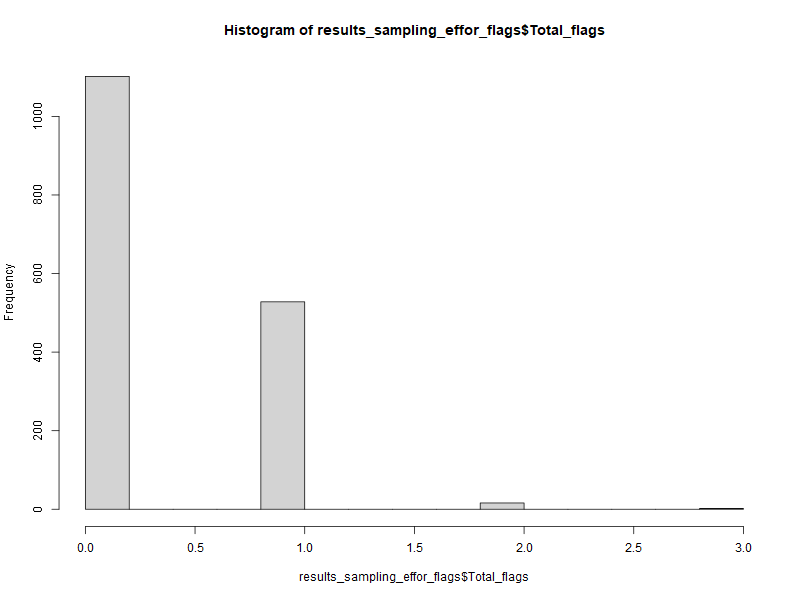

In [481]:
hist(results_sampling_effor_flags$Total_flags)

In [482]:
grid_10km_samping <- grid_10km %>%
  left_join(results_sampling_effor_flags, by = "id_10km") 

grid_10km_samping

Simple feature collection with 7268 features and 24 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.32114 ymin: -6.003704 xmax: -74.19902 ymax: 2.31959
Geodetic CRS:  WGS 84
First 10 features:
       left      top    right   bottom id_10km Total_records Total_genus
1  464459.9 10256386 474459.9 10246386       1            NA          NA
2  464459.9 10246386 474459.9 10236386       2            NA          NA
3  464459.9 10236386 474459.9 10226386       3            NA          NA
4  464459.9 10226386 474459.9 10216386       4            NA          NA
5  464459.9 10216386 474459.9 10206386       5            NA          NA
6  464459.9 10206386 474459.9 10196386       6            NA          NA
7  464459.9 10196386 474459.9 10186386       7            NA          NA
8  464459.9 10186386 474459.9 10176386       8            NA          NA
9  464459.9 10176386 474459.9 10166386       9            NA          NA
10 464459.9 10166386 474459.9 10156386      10      

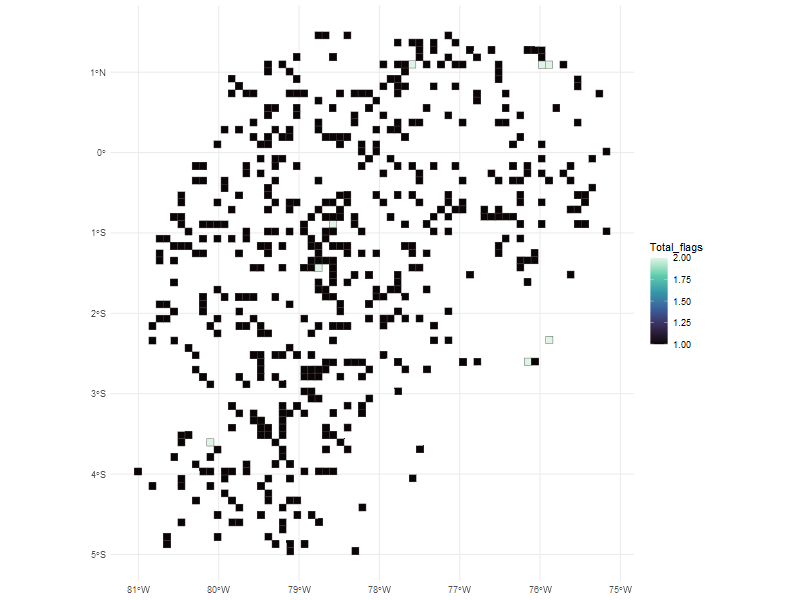

In [483]:
grid_10km_samping_filter = grid_10km_samping %>%
  filter(Total_flags>=1 ) 

ggplot(filtrado) +
geom_sf(aes(fill = Total_flags ), color = "grey30", size = 0.1) +
scale_fill_viridis_c(option = "mako") +
theme_minimal()

# 7. Exportar resultados

In [484]:

 st_write(grid_10km_samping, "Results/shp/grid_10km_samping_filter.shp", append=FALSE)

Deleting layer `grid_10km_samping_filter' using driver `ESRI Shapefile'
Writing layer `grid_10km_samping_filter' to data source 
  `Results/shp/grid_10km_samping_filter.shp' using driver `ESRI Shapefile'
Writing 7268 features with 24 fields and geometry type Polygon.


Warning message:
In abbreviate_shapefile_names(obj) :
  Field names abbreviated for ESRI Shapefile driver
